# WeatherPy

An analysis of the weather as we approach the equator, using Python requests,  OpenWeatherMap API, JSON, Pandas, and Matplotlib to visualize the weather of 500+ random cities across the world of varying distance from the equator.

In [2]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests as req
from citipy import citipy
from random import uniform
import openweathermapy.core as ow
import urllib.request
import apikeys

ModuleNotFoundError: No module named 'requests'

In [2]:
# API key
api_key = apikeys.owm_key

# Generate Cities

In [3]:
# Selecting coordinates
number_of_coordinates = 2000

# create empty list of coordinates
coordinates = []

# randomly select longtitude and latitude
lat, lon  = uniform(-90, 90), uniform(-180,180)

def newpoint():
    return uniform(-90, 90), uniform(-180,180)

points = (newpoint() for x in range(number_of_coordinates))

for point in points:
    if point not in coordinates:
        coordinates.append(point) 
        
df = pd.DataFrame(coordinates, columns=['latitude','longitude'])
df.head()

,latitude,longitude
0,-87.029835,63.074120
1,-59.936925,10.635348
2,-74.485518,140.878403
3,55.596284,58.115494
4,5.966082,-51.900033


In [4]:
# create empty columns
df['city_code'] = ""
df['City'] = ""
df['Country'] = ""

row = 0

for lat, lon in coordinates: 
    df.iloc[row,2] = citipy.nearest_city(lat, lon)
    df.iloc[row,3] = df.iloc[row,2].city_name
    df.iloc[row,4] = df.iloc[row,2].country_code
    row += 1
df = df.drop(columns=['city_code'])

# drop duplicate cities
df = df.drop_duplicates(['City'], keep='last')
df = df.reset_index(drop=True)

print('number of unique cities:', df['City'].nunique())
df.head() 

number of unique cities: 730


,latitude,longitude,city_code,City,Country
0,55.596284,58.115494,<citipy.citipy.City object at 0x000001DEC303C908>,mesyagutovo,ru
1,5.966082,-51.900033,<citipy.citipy.City object at 0x000001DEC20F59E8>,kourou,gf
2,63.716262,91.055342,<citipy.citipy.City object at 0x000001DEC3123240>,teya,ru
3,54.278775,99.630564,<citipy.citipy.City object at 0x000001DEC30E9CF8>,shumskiy,ru
4,-4.758039,-72.342994,<citipy.citipy.City object at 0x000001DEC2A412E8>,saquena,pe


# Perform API calls

In [5]:
# create empty columns
df['Max Temp'] = ""
df['Humidity'] = ""
df['Cloudiness'] = ""
df['Wind Speed'] = ""
df['Date'] = ""

city_no = 1

# loop through rows
for index, row in df.iterrows():
    
        # Parameters
    q = row['City'] + ',' + row['Country']
  
    # Print log to ensure loop is working correctly
    print('Retrieving data for city ' + str(city_no) + ': ' + row['City'] + 
          ', requested URL: http://api.openweathermap.org/data/2.5/weather?q='+ q)
    
    try:
        # Run OpenWatherMapy request
        current_weather = ow.get_current(q=q, units="imperial", appid=api_key)
    
        # get specific data
        temp = current_weather["main"]["temp_max"]
        humidity = current_weather["main"]["humidity"]
        cloudiness = current_weather["clouds"]["all"]
        wind_speed = current_weather["wind"]["speed"]
        date = current_weather["dt"]
    
        # Store the weather data into the Data Frame
        df.set_value(index, "Max Temp", temp)
        df.set_value(index, "Humidity", humidity)
        df.set_value(index, "Cloudiness", cloudiness)
        df.set_value(index, "Wind Speed", wind_speed)
        df.set_value(index, "Date", date)
    
    except urllib.error.HTTPError as err:
        pass
    
    city_no += 1
        
print('-----------------------------')
print('   Data Retrieval Complete   ')
print('-----------------------------')

Retrieving data for city 1: mesyagutovo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mesyagutovo,ru
Retrieving data for city 2: kourou, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kourou,gf
Retrieving data for city 3: teya, requested URL: http://api.openweathermap.org/data/2.5/weather?q=teya,ru
Retrieving data for city 4: shumskiy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=shumskiy,ru
Retrieving data for city 5: saquena, requested URL: http://api.openweathermap.org/data/2.5/weather?q=saquena,pe
Retrieving data for city 6: pierre, requested URL: http://api.openweathermap.org/data/2.5/weather?q=pierre,us
Retrieving data for city 7: kazalinsk, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kazalinsk,kz
Retrieving data for city 8: zharkent, requested URL: http://api.openweathermap.org/data/2.5/weather?q=zharkent,kz
Retrieving data for city 9: andros town, requested URL: http://api.openweathermap.org/data/2.5/wea

Retrieving data for city 73: mughal sarai, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mughal sarai,in
Retrieving data for city 74: saint-amand-les-eaux, requested URL: http://api.openweathermap.org/data/2.5/weather?q=saint-amand-les-eaux,fr
Retrieving data for city 75: sambava, requested URL: http://api.openweathermap.org/data/2.5/weather?q=sambava,mg
Retrieving data for city 76: padang, requested URL: http://api.openweathermap.org/data/2.5/weather?q=padang,id
Retrieving data for city 77: maceio, requested URL: http://api.openweathermap.org/data/2.5/weather?q=maceio,br
Retrieving data for city 78: boralday, requested URL: http://api.openweathermap.org/data/2.5/weather?q=boralday,kz
Retrieving data for city 79: stromness, requested URL: http://api.openweathermap.org/data/2.5/weather?q=stromness,gb
Retrieving data for city 80: mantua, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mantua,cu
Retrieving data for city 81: mahadday weyne, requested URL: 

Retrieving data for city 144: tarakan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=tarakan,id
Retrieving data for city 145: nkhotakota, requested URL: http://api.openweathermap.org/data/2.5/weather?q=nkhotakota,mw
Retrieving data for city 146: puerto colombia, requested URL: http://api.openweathermap.org/data/2.5/weather?q=puerto colombia,co
Retrieving data for city 147: oistins, requested URL: http://api.openweathermap.org/data/2.5/weather?q=oistins,bb
Retrieving data for city 148: snasa, requested URL: http://api.openweathermap.org/data/2.5/weather?q=snasa,no
Retrieving data for city 149: coihaique, requested URL: http://api.openweathermap.org/data/2.5/weather?q=coihaique,cl
Retrieving data for city 150: gweta, requested URL: http://api.openweathermap.org/data/2.5/weather?q=gweta,bw
Retrieving data for city 151: gat, requested URL: http://api.openweathermap.org/data/2.5/weather?q=gat,ly
Retrieving data for city 152: saleaula, requested URL: http://api.openweatherm

Retrieving data for city 215: kuusankoski, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kuusankoski,fi
Retrieving data for city 216: libreville, requested URL: http://api.openweathermap.org/data/2.5/weather?q=libreville,ga
Retrieving data for city 217: saint-francois, requested URL: http://api.openweathermap.org/data/2.5/weather?q=saint-francois,gp
Retrieving data for city 218: wahran, requested URL: http://api.openweathermap.org/data/2.5/weather?q=wahran,dz
Retrieving data for city 219: los llanos de aridane, requested URL: http://api.openweathermap.org/data/2.5/weather?q=los llanos de aridane,es
Retrieving data for city 220: iturama, requested URL: http://api.openweathermap.org/data/2.5/weather?q=iturama,br
Retrieving data for city 221: ancud, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ancud,cl
Retrieving data for city 222: ketchikan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ketchikan,us
Retrieving data for city 223: hala

Retrieving data for city 286: mapiripan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mapiripan,co
Retrieving data for city 287: birzai, requested URL: http://api.openweathermap.org/data/2.5/weather?q=birzai,lt
Retrieving data for city 288: ilulissat, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ilulissat,gl
Retrieving data for city 289: biabou, requested URL: http://api.openweathermap.org/data/2.5/weather?q=biabou,vc
Retrieving data for city 290: nanga eboko, requested URL: http://api.openweathermap.org/data/2.5/weather?q=nanga eboko,cm
Retrieving data for city 291: shentala, requested URL: http://api.openweathermap.org/data/2.5/weather?q=shentala,ru
Retrieving data for city 292: hobyo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=hobyo,so
Retrieving data for city 293: beringovskiy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=beringovskiy,ru
Retrieving data for city 294: yining, requested URL: http://api.open

Retrieving data for city 356: beira, requested URL: http://api.openweathermap.org/data/2.5/weather?q=beira,mz
Retrieving data for city 357: urengoy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=urengoy,ru
Retrieving data for city 358: kondinskoye, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kondinskoye,ru
Retrieving data for city 359: chimbote, requested URL: http://api.openweathermap.org/data/2.5/weather?q=chimbote,pe
Retrieving data for city 360: lorengau, requested URL: http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg
Retrieving data for city 361: ihosy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ihosy,mg
Retrieving data for city 362: sedelnikovo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=sedelnikovo,ru
Retrieving data for city 363: joao pinheiro, requested URL: http://api.openweathermap.org/data/2.5/weather?q=joao pinheiro,br
Retrieving data for city 364: mahajanga, requested URL: http://a

Retrieving data for city 427: shediac, requested URL: http://api.openweathermap.org/data/2.5/weather?q=shediac,ca
Retrieving data for city 428: aksay, requested URL: http://api.openweathermap.org/data/2.5/weather?q=aksay,kz
Retrieving data for city 429: auki, requested URL: http://api.openweathermap.org/data/2.5/weather?q=auki,sb
Retrieving data for city 430: herat, requested URL: http://api.openweathermap.org/data/2.5/weather?q=herat,af
Retrieving data for city 431: saint-pierre, requested URL: http://api.openweathermap.org/data/2.5/weather?q=saint-pierre,pm
Retrieving data for city 432: qasigiannguit, requested URL: http://api.openweathermap.org/data/2.5/weather?q=qasigiannguit,gl
Retrieving data for city 433: naousa, requested URL: http://api.openweathermap.org/data/2.5/weather?q=naousa,gr
Retrieving data for city 434: ossora, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ossora,ru
Retrieving data for city 435: henties bay, requested URL: http://api.openweathermap.

Retrieving data for city 498: kieta, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kieta,pg
Retrieving data for city 499: cao bang, requested URL: http://api.openweathermap.org/data/2.5/weather?q=cao bang,vn
Retrieving data for city 500: stornoway, requested URL: http://api.openweathermap.org/data/2.5/weather?q=stornoway,gb
Retrieving data for city 501: kahului, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kahului,us
Retrieving data for city 502: aitape, requested URL: http://api.openweathermap.org/data/2.5/weather?q=aitape,pg
Retrieving data for city 503: ayan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ayan,ru
Retrieving data for city 504: morant bay, requested URL: http://api.openweathermap.org/data/2.5/weather?q=morant bay,jm
Retrieving data for city 505: flin flon, requested URL: http://api.openweathermap.org/data/2.5/weather?q=flin flon,ca
Retrieving data for city 506: aleksandrovsk-sakhalinskiy, requested URL: http://api.

Retrieving data for city 569: collierville, requested URL: http://api.openweathermap.org/data/2.5/weather?q=collierville,us
Retrieving data for city 570: terney, requested URL: http://api.openweathermap.org/data/2.5/weather?q=terney,ru
Retrieving data for city 571: bady bassitt, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bady bassitt,br
Retrieving data for city 572: ouesso, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ouesso,cg
Retrieving data for city 573: leshukonskoye, requested URL: http://api.openweathermap.org/data/2.5/weather?q=leshukonskoye,ru
Retrieving data for city 574: omboue, requested URL: http://api.openweathermap.org/data/2.5/weather?q=omboue,ga
Retrieving data for city 575: magomeni, requested URL: http://api.openweathermap.org/data/2.5/weather?q=magomeni,tz
Retrieving data for city 576: half moon bay, requested URL: http://api.openweathermap.org/data/2.5/weather?q=half moon bay,us
Retrieving data for city 577: coahuayana, reques

Retrieving data for city 640: illoqqortoormiut, requested URL: http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl
Retrieving data for city 641: mataura, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mataura,pf
Retrieving data for city 642: jamestown, requested URL: http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh
Retrieving data for city 643: rikitea, requested URL: http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf
Retrieving data for city 644: alice springs, requested URL: http://api.openweathermap.org/data/2.5/weather?q=alice springs,au
Retrieving data for city 645: agva, requested URL: http://api.openweathermap.org/data/2.5/weather?q=agva,tr
Retrieving data for city 646: porto novo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=porto novo,cv
Retrieving data for city 647: arraial do cabo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br
Retrieving data for city 648: coquimbo

Retrieving data for city 710: cururupu, requested URL: http://api.openweathermap.org/data/2.5/weather?q=cururupu,br
Retrieving data for city 711: barrow, requested URL: http://api.openweathermap.org/data/2.5/weather?q=barrow,us
Retrieving data for city 712: srivardhan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=srivardhan,in
Retrieving data for city 713: puerto ayora, requested URL: http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec
Retrieving data for city 714: prince rupert, requested URL: http://api.openweathermap.org/data/2.5/weather?q=prince rupert,ca
Retrieving data for city 715: yenagoa, requested URL: http://api.openweathermap.org/data/2.5/weather?q=yenagoa,ng
Retrieving data for city 716: yellowknife, requested URL: http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca
Retrieving data for city 717: tura, requested URL: http://api.openweathermap.org/data/2.5/weather?q=tura,ru
Retrieving data for city 718: hobart, requested URL: http:

In [6]:
# change data type
df[['Max Temp','Humidity','Cloudiness','Wind Speed']] = df[['Max Temp','Humidity','Cloudiness','Wind Speed']].apply(pd.to_numeric)

# drop NAN rows
df = df.dropna(how='any')

df.nunique()

latitude      621
longitude     621
city_code     621
City          621
Country       129
Max Temp      359
Humidity       74
Cloudiness     22
Wind Speed    175
dtype: int64

In [7]:
# sample 500
df = df.sample(n=500)

# display data
df = df.reset_index(drop=True)
df.head()

,latitude,longitude,city_code,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed
0,20.257065,8.386680,<citipy.citipy.City object at 0x000001DEC29506D8>,arlit,ne,52.65,41.0,0.0,3.18
1,48.098205,145.504056,<citipy.citipy.City object at 0x000001DEC30AA160>,poronaysk,ru,10.53,100.0,0.0,11.79
2,18.990821,48.744665,<citipy.citipy.City object at 0x000001DEC3199B00>,najran,sa,55.40,37.0,0.0,4.18
3,72.631329,22.890808,<citipy.citipy.City object at 0x000001DEC29B4DD8>,hammerfest,no,21.20,79.0,20.0,11.90
4,-48.584613,-48.507557,<citipy.citipy.City object at 0x000001DEC198B898>,mar del plata,ar,53.33,94.0,0.0,5.75


# Save DataFrame

In [8]:
# save DataFrame as CSV
outpute = os.path.join('results', 'results.csv')
measurement_df.to_csv(output, index=False, header=True)

# Latitude vs Temperature Plot

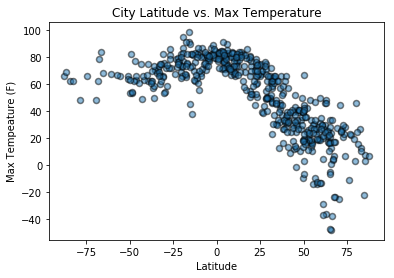

In [9]:
x_vals = df['latitude']
y_temp = df['Max Temp']
plt.scatter(x_vals, y_temp, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Tempeature (F)')
plt.xlabel('Latitude')
plt.savefig('results/maxtemp.png')
plt.show()

# Latitude vs. Humidity Plot

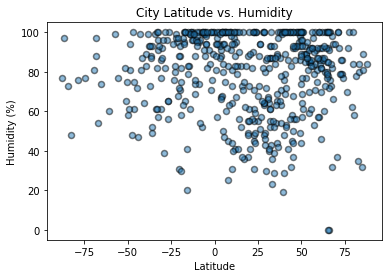

In [10]:
y_humidity = df['Humidity']
plt.scatter(x_vals, y_humidity, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('results/humidity.png')
plt.show()

# Latitude vs. Cloudiness Plot

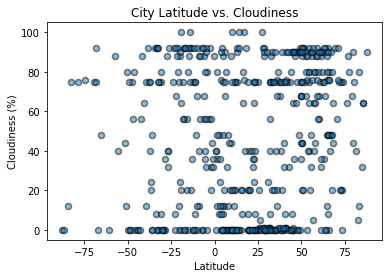

In [11]:
y_cloud = df['Cloudiness']
plt.scatter(x_vals, y_cloud, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.savefig('results/cloudiness.png')
plt.show()

# Latitude vs. Wind Speed Plot

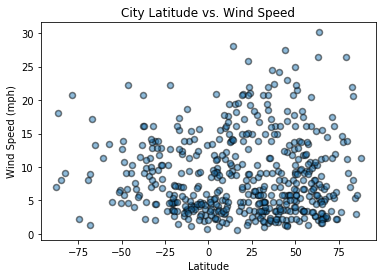

In [12]:
y_cloud = df['Wind Speed']
plt.scatter(x_vals, y_cloud, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('results/windspeed.png')
plt.show()